This ipynb includes useful insight for the Firms investing in Cab industry.The analysis is conducted based on the data available from 2016 to 2018 for two prominenet Cab companies.The findings can be beneficial for the firms planning to invest in Cab industry

####Mounting the drive

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Loading Dataframes

In [3]:
CAb_data=pd.read_csv("//content//drive//MyDrive//dataset//Cab_Data_new.csv")
City_data=pd.read_csv("//content//drive//MyDrive//dataset//City.csv")
Customer_ID=pd.read_csv("//content//drive//MyDrive//dataset//Customer_ID.csv")
Transaction_id=pd.read_csv("//content//drive//MyDrive//dataset//Transaction_ID.csv")


###Displaying the datasets

In [4]:
print(CAb_data.head(250))
print(City_data.head(5))
print(Customer_ID.head(5))
print(Transaction_id.head(5))


     Transaction ID Date of Travel     Company        City  KM Travelled  \
0          10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1          10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
2          10000013     2016-01-02    Pink Cab  ATLANTA GA          9.04   
3          10000014     2016-01-07    Pink Cab  ATLANTA GA         33.17   
4          10000015     2016-01-03    Pink Cab  ATLANTA GA          8.73   
..              ...            ...         ...         ...           ...   
245        10000396     2016-01-03  Yellow Cab  ATLANTA GA         24.75   
246        10000397     2016-01-08  Yellow Cab  ATLANTA GA         18.90   
247        10000398     2016-01-02  Yellow Cab  ATLANTA GA         38.85   
248        10000399     2016-01-06  Yellow Cab  ATLANTA GA         18.81   
249        10000400     2016-01-07  Yellow Cab  ATLANTA GA         17.10   

     Price Charged  Cost of Trip  
0           370.95      313.6350  
1           358.5

####Checking Missing Data

In [5]:
#CAb_data.info()
print(CAb_data.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [6]:
#checking the incities
City_data.info()
print(City_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
City          0
Population    0
Users         0
dtype: int64


In [7]:
Customer_ID.info()
print(Customer_ID.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [8]:

Transaction_id.info()
print(Transaction_id.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


###Exploratory Data Analysis

#####Toatal KM travelled by the companies

In [9]:
#Tatal Distance covered by Pink and Yellow cab
average_distance = CAb_data.groupby('Company')['KM Travelled'].sum()
print(average_distance)


Company
Pink Cab      1911073.11
Yellow Cab    6199417.47
Name: KM Travelled, dtype: float64


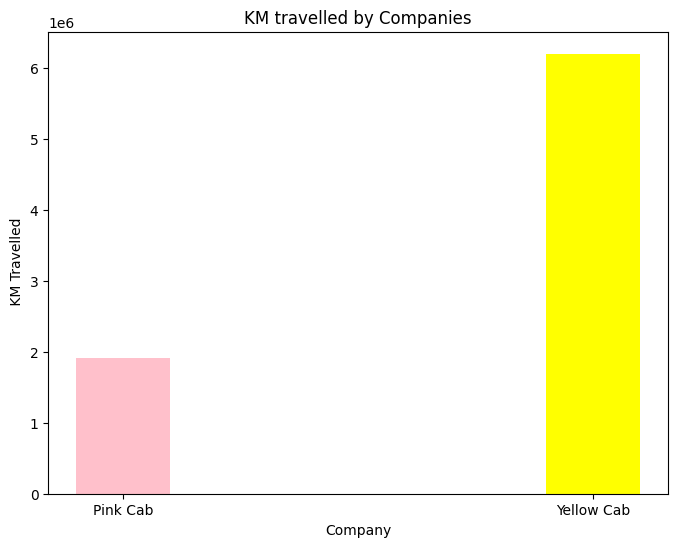

In [10]:
data = {'Pink Cab': 1911073.11, 'Yellow Cab': 6199417.47}

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(data.keys(),data.values(), color=['pink', 'yellow'],width = 0.2)
plt.xlabel('Company')
plt.ylabel(' KM Travelled')
plt.title('KM travelled by Companies')
plt.show()


####Market Share of Companies based on no:of rides

How the service is distributed over both the companies Company
Yellow Cab    0.764294
Pink Cab      0.235706
Name: proportion, dtype: float64


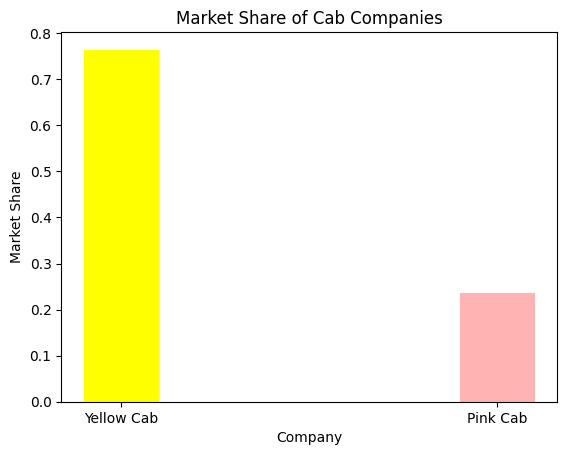

In [11]:
#Estimating and plotting the Market Shares of the company
market_share = CAb_data['Company'].value_counts(normalize=True)
print("How the service is distributed over both the companies",market_share)
# Plotting
colours = ['yellow','#ffb3b3']
plt.bar(market_share.index, market_share.values,color =colours,width =0.2)
plt.title('Market Share of Cab Companies')
plt.xlabel('Company')
plt.ylabel('Market Share')
plt.show()

####Estimating the Total Revenue and Profit for each companies

In [12]:
#Estimating the Average Revenue from each Cab
Total_Revenue = CAb_data.groupby('Company')['Price Charged'].mean()
Actula_cost = CAb_data.groupby('Company')['Cost of Trip'].mean()
Profit = Total_Revenue - Actula_cost
print(Profit)

Company
Pink Cab       62.652174
Yellow Cab    160.259986
dtype: float64


In [13]:
Total_revenue = CAb_data.groupby('Company')[['KM Travelled', 'Price Charged']].sum()
print(Total_revenue)

            KM Travelled  Price Charged
Company                                
Pink Cab      1911073.11   2.632825e+07
Yellow Cab    6199417.47   1.258539e+08


In [14]:
#Finding the Total profit
revenue_analysis = CAb_data.groupby('Company').sum()[['Price Charged', 'Cost of Trip']]
revenue_analysis['Profit'] = revenue_analysis['Price Charged'] - revenue_analysis['Cost of Trip']
print(revenue_analysis)

            Price Charged  Cost of Trip        Profit
Company                                              
Pink Cab     2.632825e+07  2.102092e+07  5.307328e+06
Yellow Cab   1.258539e+08  8.183351e+07  4.402037e+07


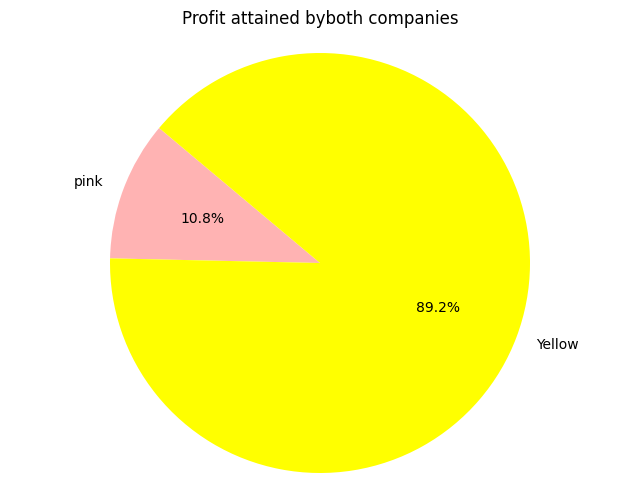

In [15]:
Total_revenue = [5307328, 44020370]

# Company labels
companies = ['pink','Yellow']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(Total_revenue, labels=companies, autopct='%1.1f%%', colors=['#ffb3b3','yellow'], startangle=140)
plt.title('Profit attained byboth companies')
plt.axis('equal')
plt.show()

####Distance covered by each companies in different Cities

In [16]:
#Finding the Cities in  which Pink_company has used for the commutation the most
Distance_travelled_incitiesPink =CAb_data[CAb_data['Company'] =='Pink Cab' ] .groupby(['Company','City'])['KM Travelled'].sum()
DIS_travelledP=Distance_travelled_incitiesPink.sort_values(ascending=False)
print(DIS_travelledP)

Company   City          
Pink Cab  LOS ANGELES CA    449656.77
          NEW YORK NY       315967.27
          SAN DIEGO CA      240703.87
          CHICAGO IL        210726.13
          BOSTON MA         117933.51
          SILICON VALLEY     86540.61
          WASHINGTON DC      82998.95
          SEATTLE WA         62000.37
          MIAMI FL           44644.45
          NASHVILLE TN       41474.17
          AUSTIN TX          41038.42
          ATLANTA GA         39715.17
          ORANGE COUNTY      33608.50
          DENVER CO          31308.15
          DALLAS TX          30389.26
          SACRAMENTO CA      30154.14
          PHOENIX AZ         18789.74
          TUCSON AZ          18022.97
          PITTSBURGH PA      15400.66
Name: KM Travelled, dtype: float64


In [17]:
#Finding the Cities in  which Yellow_company has used for the commutation the most
Distance_travelled_incitiesYellow =CAb_data[CAb_data['Company'] =='Yellow Cab' ] .groupby(['Company','City'])['KM Travelled'].sum()
DIS_travelledY=Distance_travelled_incitiesYellow.sort_values(ascending=False)
print(DIS_travelledY)

Company     City          
Yellow Cab  NEW YORK NY       1932842.47
            CHICAGO IL        1070978.26
            WASHINGTON DC      906038.71
            LOS ANGELES CA     639078.88
            BOSTON MA          552454.67
            SAN DIEGO CA       219799.82
            ATLANTA GA         128928.59
            DALLAS TX          127392.79
            SEATTLE WA         118903.62
            SILICON VALLEY     107172.36
            MIAMI FL           100773.72
            AUSTIN TX           68168.88
            ORANGE COUNTY       55218.19
            DENVER CO           54561.60
            PHOENIX AZ          27035.34
            NASHVILLE TN        26850.57
            TUCSON AZ           25206.84
            SACRAMENTO CA       23707.06
            PITTSBURGH PA       14305.10
Name: KM Travelled, dtype: float64


In [18]:
Distance_travelled_incities = CAb_data.groupby(['Company','City'])['KM Travelled'].sum()
print(Distance_travelled_incities)

Company     City          
Pink Cab    ATLANTA GA          39715.17
            AUSTIN TX           41038.42
            BOSTON MA          117933.51
            CHICAGO IL         210726.13
            DALLAS TX           30389.26
            DENVER CO           31308.15
            LOS ANGELES CA     449656.77
            MIAMI FL            44644.45
            NASHVILLE TN        41474.17
            NEW YORK NY        315967.27
            ORANGE COUNTY       33608.50
            PHOENIX AZ          18789.74
            PITTSBURGH PA       15400.66
            SACRAMENTO CA       30154.14
            SAN DIEGO CA       240703.87
            SEATTLE WA          62000.37
            SILICON VALLEY      86540.61
            TUCSON AZ           18022.97
            WASHINGTON DC       82998.95
Yellow Cab  ATLANTA GA         128928.59
            AUSTIN TX           68168.88
            BOSTON MA          552454.67
            CHICAGO IL        1070978.26
            DALLAS TX         

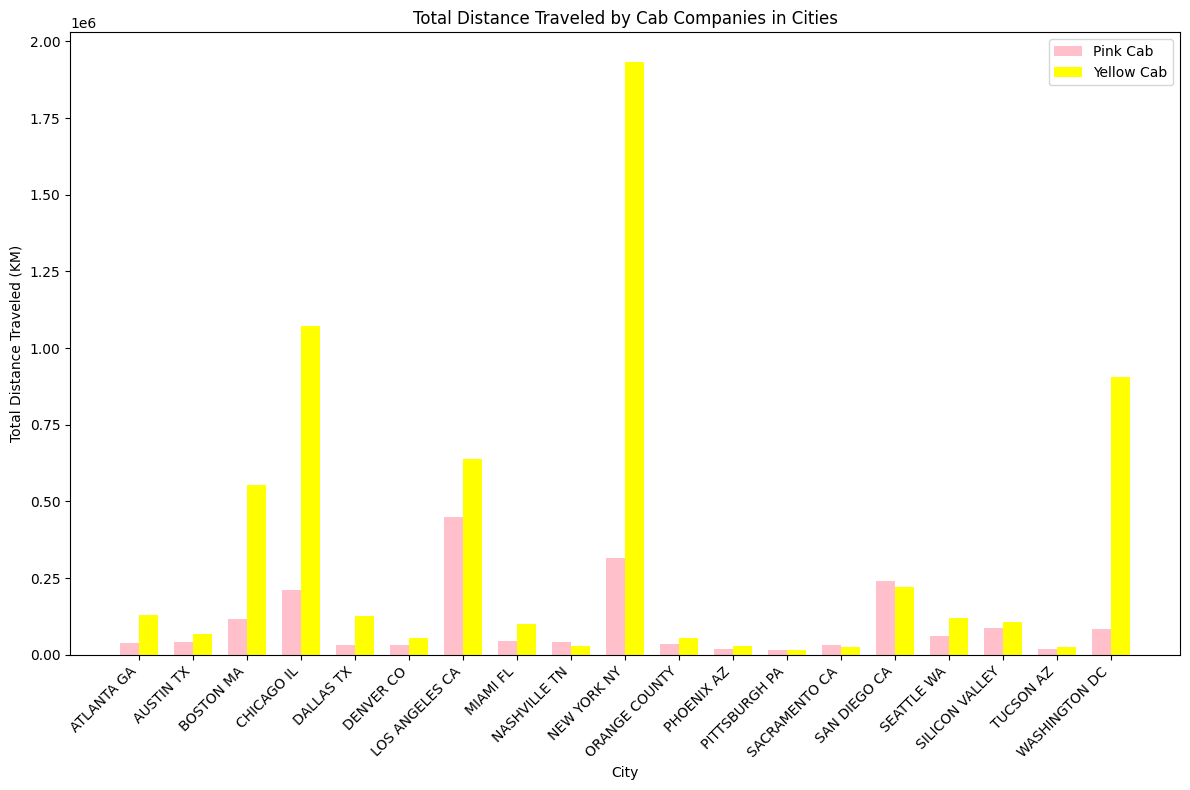

In [24]:

Distance_travelled_incities = Distance_travelled_incities.unstack()#Unstacking the dataframe

cities = Distance_travelled_incities.index # defining the indices
bar_width = 0.35 #Defining the bar width
index = np.arange(len(cities))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, Distance_travelled_incities['Pink Cab'], width=bar_width, color='pink', label='Pink Cab')
plt.bar(index + bar_width, Distance_travelled_incities['Yellow Cab'], width=bar_width, color='yellow', label='Yellow Cab')
plt.title('Total Distance Traveled by Cab Companies in Cities')
plt.xlabel('City')
plt.ylabel('Total Distance Traveled (KM)')
plt.xticks(index + bar_width / 2, cities, rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()
plt.tight_layout()
plt.show()


###Merging and Appending dataframes with required columns


In [19]:
#Mergind Cab_data with Tranactin_ID data and appending required column to it
merged_df = pd.merge(CAb_data, Transaction_id[['Transaction ID','Payment_Mode','Customer ID' ]], on='Transaction ID', how='left')
CAb_data['Payment_Mode'] = merged_df['Payment_Mode']
CAb_data['Customer ID'] = merged_df['Customer ID']

In [20]:
#Creating the Master Data
merged_df = pd.merge(CAb_data, Customer_ID[['Customer ID','Gender','Age','Income (USD/Month)' ]], on='Customer ID', how='left')
CAb_data['Gender'] = merged_df[['Gender']]
CAb_data['Age'] = merged_df[['Age']]
CAb_data['Income (USD/Month)'] = merged_df[['Income (USD/Month)']]

In [21]:
CAb_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Customer ID,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,29290,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,27703,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,28712,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,28020,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,27182,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,52392,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,53286,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,52265,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,52175,Male,32,6423


####Finding the gender and age catogory that uses cab service the most

In [23]:
#Identifing the number of males and females has used the cab
gender_usage = CAb_data['Gender'].value_counts()

In [27]:
print("Total no:of Males and Females used the Cabe dusing the year 2016-2018",gender_usage)

Total no:of Males and Females used the Cabe dusing the year 2016-2018 Gender
Male      205912
Female    153480
Name: count, dtype: int64


In [28]:
#Estimating males and females that used pink and yellow cab.Trying to find any correlation between them
Female_pinkcab=CAb_data[(CAb_data['Gender'] == 'Female')&(CAb_data['Company'] == 'Pink Cab')]

Male_pinkcab=CAb_data[(CAb_data['Gender'] == 'Male')&(CAb_data['Company'] == 'Pink Cab')]

Female_yellowcab=CAb_data[(CAb_data['Gender'] == 'Female')&(CAb_data['Company'] == 'Yellow Cab')]

Male_yellowcab=CAb_data[(CAb_data['Gender'] == 'Male')&(CAb_data['Company'] == 'Yellow Cab')]

Male_yellowcab = len(Male_yellowcab)
Female_pink_count = len(Female_pinkcab)
Male_pinkcab = len(Male_pinkcab)
Female_yellow_count = len(Female_yellowcab)

In [29]:
print('Females preferred Pink cab',Female_pink_count)
print('Males preferred Pink cab',Male_pinkcab)
print('Females preferred Yellow cab',Female_yellow_count)
print('Males preferred Yellow cab',Male_yellowcab)

Females preferred Pink cab 37480
Males preferred Pink cab 47231
Females preferred Yellow cab 116000
Males preferred Yellow cab 158681


In [30]:
Pink_Cabusers=CAb_data[(CAb_data['Company'] == 'Pink Cab')]
Yellow_Cabusers=CAb_data[(CAb_data['Company'] == 'Yellow Cab')]
print("Total Pink cab users:",len(Pink_Cabusers))
print("Toatal Yellow cab users:",len(Yellow_Cabusers))

Total Pink cab users: 84711
Toatal Yellow cab users: 274681


Cab Usage by Age Group:
Age Group
21-30    116430
31-40    112735
41-50     47017
51-60     38087
61+       22686
0-20      22437
Name: count, dtype: int64

The age group that used the cab the most: 21-30


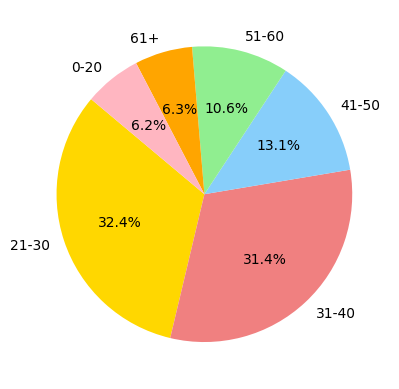

In [33]:
#Finding which age group has used the cab the most
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
CAb_data['Age Group'] = pd.cut(CAb_data['Age'], bins=bins, labels=labels, right=False) #Adding a coloumn age group
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightpink']
age_group = CAb_data['Age Group'].value_counts() # determining the count
plt.pie(age_group, labels=age_group.index, autopct='%1.1f%%', startangle=140,colors =colors )

print("Cab Usage by Age Group:")
print(age_group)


most_used_age = age_group.idxmax()
print("\nThe age group that used the cab the most:", most_used_age)


####

In [52]:
#findind how the Income of individulas influvence their choice of cab.
cab_usage_df = CAb_data.unstack()
#defining Bins and lables for the Income catogories and adding a coloum to the exixting dataframe
CAb_data['Income Level'] = pd.cut(CAb_data['Income (USD/Month)'], bins=[0, 5000, 10000, 15000, 20000, float('inf')], labels=['<5K', '5K-10K', '10K-15K', '15K-20K', '>20K'])

# Group CAb_data by 'Income Level'
income_groups = CAb_data.groupby('Income Level')

# Print the cab usage statistics
print(income_groups)

# Now you can use income_groups for further analysis


#### Which company has the maximum cab users at a particular time period?

In [53]:

# Grouping data by 'Date of Travel' and aggregating based on useful metrics
daily_analysis = CAb_data.groupby('Date of Travel').agg({
    'Transaction ID': 'count',  # Number of rides
    'Customer ID': 'nunique',   # Number of unique customers
    'KM Travelled': 'sum',      # Total KM travelled
    'Price Charged': 'sum',     # Total price charged
    'Cost of Trip': 'sum'       # Total cost of trips
})

# Renaming columns for clarity
daily_analysis.columns = [
    'Total Rides',
    'Number of Customers',
    'Total KM Travelled',
    'Total Price Charged',
    'Total Cost of Trip'
]

print(daily_analysis)



                Total Rides  Number of Customers  Total KM Travelled  \
Date of Travel                                                         
2016-01-02              181                  181             4093.96   
2016-01-03              178                  178             4169.83   
2016-01-04               25                   25              528.47   
2016-01-05               47                   47             1242.83   
2016-01-06              109                  109             2435.43   
...                     ...                  ...                 ...   
2018-12-27              318                  315             7098.07   
2018-12-28              843                  822            18581.99   
2018-12-29              825                  809            18833.22   
2018-12-30              257                  253             5777.70   
2018-12-31              256                  254             5868.19   

                Total Price Charged  Total Cost of Trip  
Date 

<ipython-input-54-91bdc93b98a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cab_data['Year'] = pink_cab_data['Date of Travel'].dt.year
<ipython-input-54-91bdc93b98a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cab_data['Year'] = yellow_cab_data['Date of Travel'].dt.year


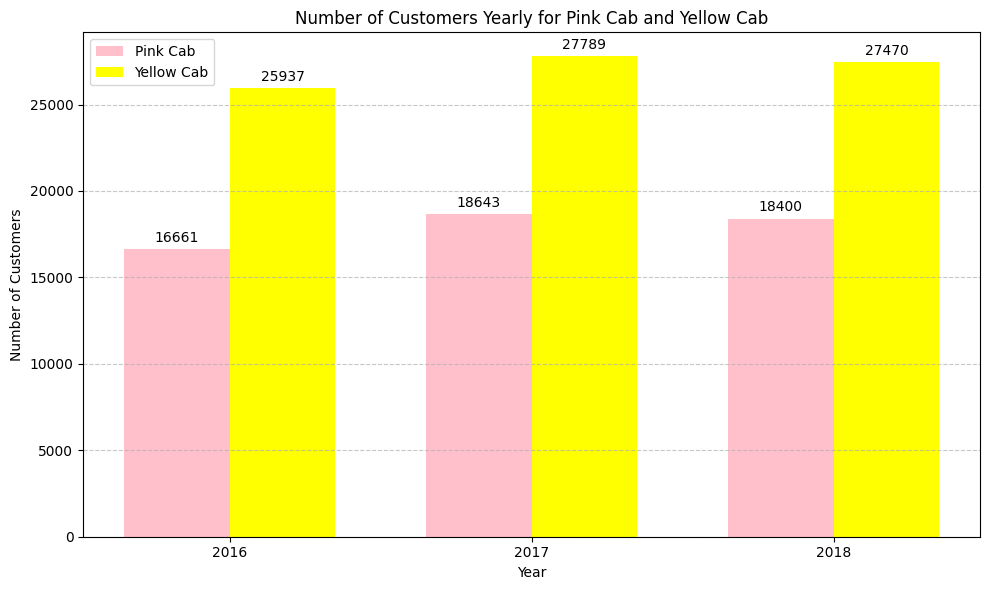

In [54]:
#Finding the pink cab users
pink_cab_data = CAb_data[CAb_data['Company'] == 'Pink Cab']
#Finding the pink cab users
yellow_cab_data = CAb_data[CAb_data['Company'] == 'Yellow Cab']

#Getting the the pink and Yellow cab users each year
pink_cab_data['Year'] = pink_cab_data['Date of Travel'].dt.year
yellow_cab_data['Year'] = yellow_cab_data['Date of Travel'].dt.year

# Grouping data by 'Year' and counting the number of unique customers for each year for Pink Cab
pink_yearly_customers = pink_cab_data.groupby('Year')['Customer ID'].nunique()

# Grouping data by 'Year' and counting the number of unique customers for each year for Yellow Cab
yellow_yearly_customers = yellow_cab_data.groupby('Year')['Customer ID'].nunique()

#Defining the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = pink_yearly_customers.index

# Plotting Pink Cab data
bars1 = ax.bar(index, pink_yearly_customers, bar_width, label='Pink Cab', color='pink')

# Plotting Yellow Cab data
bars2 = ax.bar(index + bar_width, yellow_yearly_customers, bar_width, label='Yellow Cab', color='yellow')

# Adding labels and title
ax.set_title('Number of Customers Yearly for Pink Cab and Yellow Cab')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Customers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for Pink Cab data
for bar in bars1:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adding annotations for Yellow Cab data
for bar in bars2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


####How the number of rides differ in each day of a month?

<Figure size 1000x600 with 0 Axes>

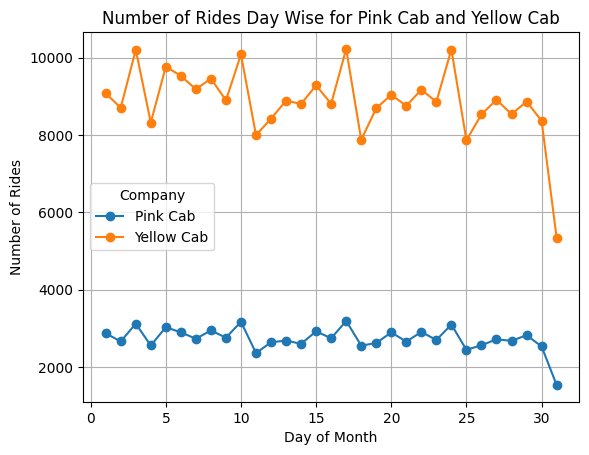

In [57]:
# Grouping the cab data w.r.t days and company
rides_daywise = CAb_data.groupby(['Day', 'Company']).size().unstack()

# Plot the number of rides day-wise for both companies
plt.figure(figsize=(10, 6))
rides_daywise.plot(kind='line', marker='o', linestyle='-')

# Adding labels and title
plt.title('Number of Rides Day Wise for Pink Cab and Yellow Cab')
plt.xlabel('Day of Month')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.legend(title='Company')

plt.show()

####How Customers prefer the service during Holidays?

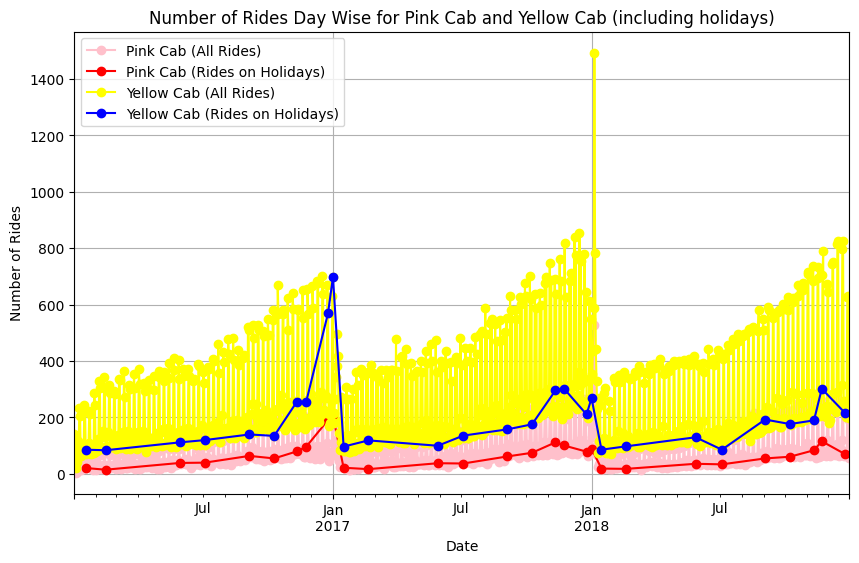

In [67]:
#Defining the Holidays in US
holidays = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
            '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25',
            '2017-01-01', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04',
            '2017-09-04', '2017-10-09', '2017-11-11', '2017-11-23', '2017-12-25',
            '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
            '2018-09-03', '2018-10-08', '2018-11-11', '2018-11-22', '2018-12-25']


# Filtering  rides that occurred on holidays for Pink Cab and Yellow Cab
rides_on_holidays_pink = CAb_data[(CAb_data['Date of Travel'].isin(holidays)) & (CAb_data['Company'] == 'Pink Cab')]
rides_on_holidays_yellow = CAb_data[(CAb_data['Date of Travel'].isin(holidays)) & (CAb_data['Company'] == 'Yellow Cab')]

# Group the data by day and count the number of rides for each day for Pink Cab and Yellow
rides_daywise_pink = CAb_data[CAb_data['Company'] == 'Pink Cab'].groupby('Date of Travel').size()
rides_daywise_yellow = CAb_data[CAb_data['Company'] == 'Yellow Cab'].groupby('Date of Travel').size()

#Plotting
plt.figure(figsize=(10, 6))

# Plotting daywise for Pink Cab
rides_daywise_pink.plot(kind='line', marker='o', color='Pink', linestyle='-', label='Pink Cab (All Rides)')

# Plotting rides on holidays for Pink Cab
rides_on_holidays_count_pink = rides_on_holidays_pink.groupby('Date of Travel').size()
rides_on_holidays_count_pink.plot(kind='line', marker='o', color='red', linestyle='-', label='Pink Cab (Rides on Holidays)')

# Plotting daywise for Yellow Cab
rides_daywise_yellow.plot(kind='line', marker='o', color='Yellow', linestyle='-', label='Yellow Cab (All Rides)')

# Plotting rides on holidays for Yellow Cab
rides_on_holidays_count_yellow = rides_on_holidays_yellow.groupby('Date of Travel').size()
rides_on_holidays_count_yellow.plot(kind='line', marker='o', color='blue', linestyle='-', label='Yellow Cab (Rides on Holidays)')

plt.title('Number of Rides Day Wise for Pink Cab and Yellow Cab (including holidays)')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.legend()

plt.show()


####How the profit differs in every year

<Figure size 1000x600 with 0 Axes>

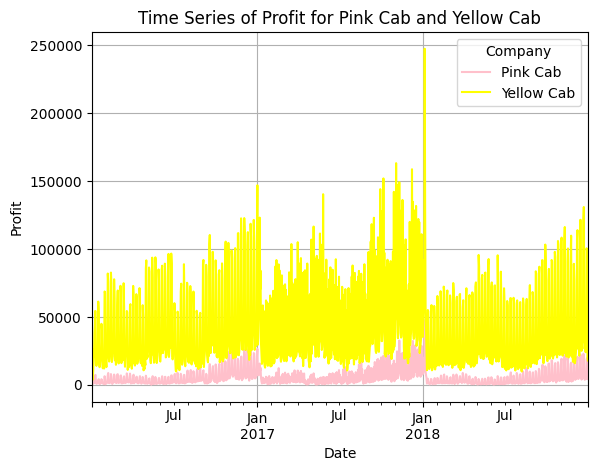

In [69]:
# Grouping the data to find the profit for both the companies on dialy basis
daily_profit_company = CAb_data.groupby(['Date of Travel', 'Company'])['Profit'].sum().unstack()

# Plot the time series of profit for both companies
plt.figure(figsize=(10, 6))
daily_profit_company.plot(color=['Pink', 'Yellow'])

plt.title('Time Series of Profit for Pink Cab and Yellow Cab')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.legend(title='Company')

plt.show()



####what is the maximum target profit an invester can attain?

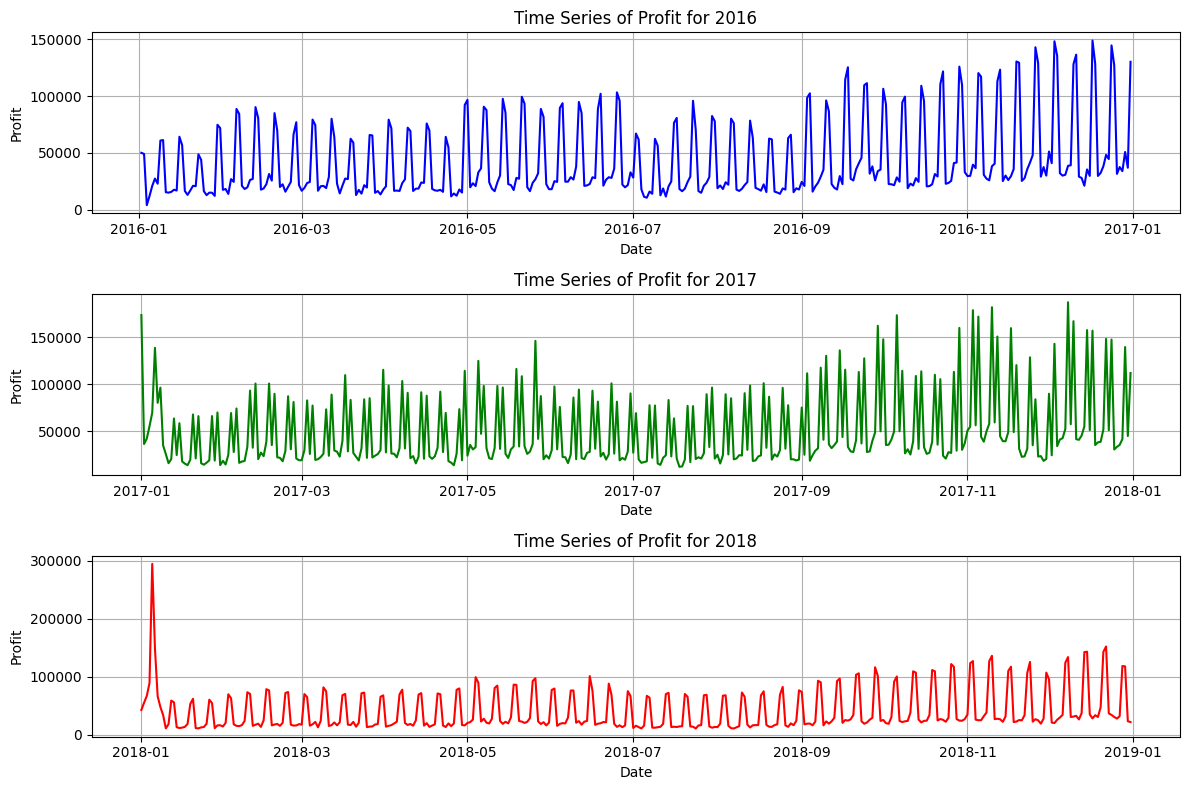

In [63]:


# Calculate profit
CAb_data['Profit'] = CAb_data['Price Charged'] - CAb_data['Cost of Trip']

# Group by date and sum the profit
daily_profit = CAb_data.groupby('Date of Travel')['Profit'].sum()

# Filter data for each year
daily_profit_2016 = daily_profit['2016']
daily_profit_2017 = daily_profit['2017']
daily_profit_2018 = daily_profit['2018']

# Plot the time series of profit for each year
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_profit_2016.index, daily_profit_2016.values, color='blue')
plt.title('Time Series of Profit for 2016')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(daily_profit_2017.index, daily_profit_2017.values, color='green')
plt.title('Time Series of Profit for 2017')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(daily_profit_2018.index, daily_profit_2018.values, color='red')
plt.title('Time Series of Profit for 2018')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)

plt.tight_layout()
plt.show()


####To predict the profit an investor can expect bythe end og 2019 based on previous stats using ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


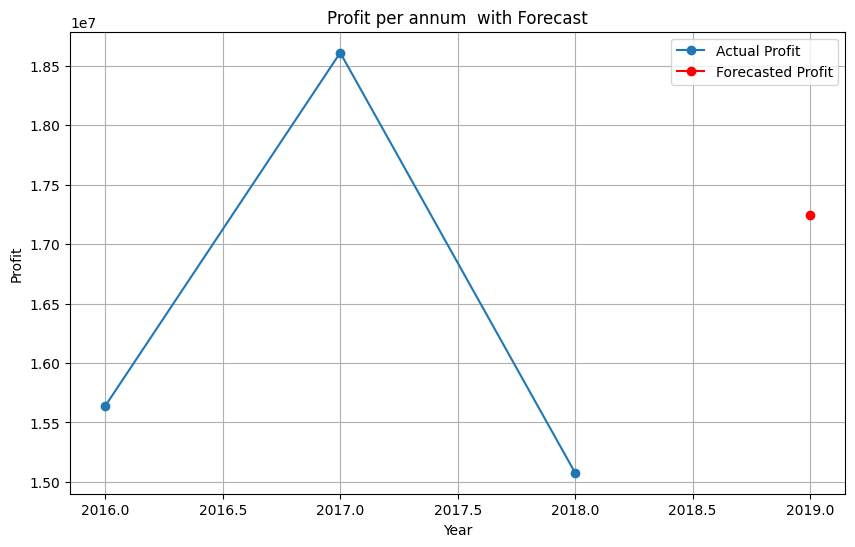

Forecasted Profit for the Next Year: 17247612.1552456


In [74]:
#Importing the statmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


# Finind the datetime and profit from 2016 -2018
CAb_data['Year'] = CAb_data['Date of Travel'].dt.year
CAb_data['Profit'] = CAb_data['Price Charged'] - CAb_data['Cost of Trip']

# Aggregate profit by year
yearly_profit = CAb_data.groupby('Year')['Profit'].sum()

# Plot the yearly profit
plt.figure(figsize=(10, 6))
plt.plot(yearly_profit.index, yearly_profit.values, marker='o', label='Actual Profit')
#Trying to design an ARIMA model with Profit data and training the model
try:
    # Fit ARIMA model
    model = ARIMA(yearly_profit.values, order=(1,0,1))
    model_fit = model.fit()

    # Forecast profit for the next year
    forecast_2019 = model_fit.forecast(steps=1)

    # Plot the forecasted value
    next_year = yearly_profit.index[-1] + 1
    plt.plot(next_year, forecast_2019, marker='o', color='red', label='Forecasted Profit')

    plt.title('Profit per annum  with Forecast')
    plt.xlabel('Year')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Forecasted Profit for the Next Year:", forecast_2019[0])

except Exception as e:
    print("Error:", e)


#Findings

It could be observed that various attribute contribute the structred running of Cab Campanies with profit.Based on the analysis performed on Pink and Yellow Cab Companies .

1. It could be infered that Yellow Cab are running with high profit in the     
cities rather than Pink.They travlled a distance 3 times higher than the Pink cab within the cities
2. It could be observed that the major market share is possed by the Yellow     cabs in terms of no: of rides.
3. Lionshare of the profit within the industry is attained by Yellow Cab.
4. In terms of Cities both the Pink and Yellow cab have flourished in their services.However, in most populated cities, the major cab services are done by Yellow Cab.
5. From the analysis it can be understood that both males and females prefer Yellow Cab over Pink. It may be because of the quality of rides or offers extended to the customers. And no: of males taken the rides  are more than that of females.
6. The age category from 21-30 has the most fantom for rides.
7. In every year the no: of customers using a pink cab is 1.5 times less than Yellow cab customers.
8. With both the cab services observing the average no:of rides in every month it could be seen that people choose  higher no:of rides during the mid of every month and the count diminishes towards ths end .this could indicate the spending habits of people.
9. The cab service used in holidays expect Christmas and Thanksgiving days is much lower than other working days.It indicate people prefer to spent holidays at home .
10. From time series profit analysis ,Pink has relatively lower profit than yellow and the profit has an increasing trend towards the end of every year.
11. While making a forecast on the profit for year 2019,it could be seen that it is expected to have a higher profit by the end of 2019 in Cab industry ,making an amount of 17247612.15 USD estimated.

From all these observation it could be suggested that Yellow Cab will be the best choice for Investors to achive a decent profit from industry.At the same time,implementing good market statergy in th Pink Cab industry by offering more services in major populated citiies and extending offeres to the young population could enchance the profit.








#END